<a href="https://www.kaggle.com/code/sonawanelalitsunil/teleco-customer-churn-prediction?scriptVersionId=206751113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Teleco Customer Churn Prediction</p>

#### Telecom Customer Churn Prediction involves analyzing customer behavior data to predict which customers are likely to leave (churn) the telecom company. This prediction can help the company take proactive steps to retain high-risk customers and improve overall customer satisfaction.

Here's a detailed breakdown of how to approach telecom customer churn prediction:

# 1. Understanding the Problem
Churn refers to customers who leave the service (e.g., cancel their subscriptions). For telecom companies, customer churn is a major concern as it affects revenue, market share, and growth potential. Predicting churn helps companies reduce attrition by targeting at-risk customers with retention strategies.

# 2. Dataset Overview
A typical telecom churn dataset might include the following columns:

CustomerID: Unique identifier for each customer.

Tenure: The duration (in months) a customer has been with the company.

MonthlyCharges: The monthly bill charged to the customer.

TotalCharges: The total amount the customer has paid since they started the service.

Churn: Whether the customer has left the company (Yes/No).

Partner: Whether the customer has a partner (Yes/No).

Dependents: Whether the customer has dependents (Yes/No).

InternetService: Type of internet service (DSL/Fiber optic/None).

OnlineSecurity, OnlineBackup, TechSupport, DeviceProtection: Additional services subscribed to.

Contract: Type of contract (Month-to-month, One year, Two year).

PaymentMethod: Method of payment (Electronic check, Mailed check, Bank transfer, Credit card).

# 3. Data Preprocessing
Before building any machine learning models, you need to preprocess the data.

## 3.1. Handling Missing Data
Check if any columns have missing or null values and handle them appropriately (e.g., fill with mean/median for numerical columns, mode for categorical columns, or remove rows/columns with excessive missing values).

## 3.2. Encoding Categorical Variables

Many machine learning algorithms cannot work directly with categorical data. Therefore, categorical columns like Partner, Dependents, InternetService, Churn, etc., must be converted to numeric values using:

Label Encoding: Converting categories into numbers (e.g., Yes = 1, No = 0).
One-Hot Encoding: Creating separate binary columns for each category (e.g., InternetService_Fiber vs. InternetService_DSL).

## 3.3. Scaling Numerical Features
Models like Logistic Regression, SVM, and Neural Networks perform better when features are scaled. You can use StandardScaler or MinMaxScaler to scale numerical features like MonthlyCharges and TotalCharges.

# 4. Exploratory Data Analysis (EDA)
Before building the model, it's useful to explore the data and gain insights:

Churn Distribution: Check the distribution of churn (e.g., percentage of customers who churn vs. those who don't).
Correlation: Visualize how numerical features like Tenure and MonthlyCharges relate to churn. You can use correlation matrices and pair plots.
Categorical Relationships: Examine the relationship between categorical features (e.g., InternetService vs Churn) using bar plots.

# 5. Model Building
Now, it's time to train a machine learning model. Some common algorithms for churn prediction include:

5.1. Logistic Regression
A simple and interpretable model often used for binary classification tasks like churn prediction.
It provides the probability of a customer churning based on input features.

# 6. Model Evaluation
After training the model, evaluate its performance using various metrics:

Accuracy: The proportion of correct predictions.
Confusion Matrix: Shows the true positives, true negatives, false positives, and false negatives.
Precision, Recall, F1-Score: For imbalanced datasets, precision, recall, and F1-score are more informative than accuracy.
ROC Curve and AUC: The area under the curve helps evaluate the classifier’s ability to distinguish between churn and non-churn.

# 7. Hyperparameter Tuning
After selecting the model, you may need to fine-tune hyperparameters to get the best performance. This can be done using GridSearchCV or RandomizedSearchCV.

# 8. Deploying the Model
Once you've trained and evaluated the model, you can deploy it for real-time predictions. For example, you might create an API using Flask or FastAPI to provide churn predictions for new customers.

# 9. Retention Strategies
Based on the model's predictions, you can design customer retention strategies:

Targeted Offers: Offer discounts or better plans to customers at high risk of churn.
Customer Support: Prioritize customer support for at-risk customers.
Personalized Campaigns: Send personalized messages or offers based on the predicted churn probability

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Import Dependencies</p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df=df.drop("customerID",axis=1)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
df.info

<bound method DataFrame.info of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL       

In [9]:
df.describe

<bound method NDFrame.describe of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [10]:
# Replace any non-numeric values in 'TotalCharges' with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Optionally, you can fill NaN values with 0 or the mean, depending on your needs
df["TotalCharges"].fillna(0, inplace=True)  # Replace NaNs with 0

In [11]:
df["TotalCharges"].nunique()

6531

In [12]:
df[df["TotalCharges"]==" "].shape

(0, 20)

In [13]:
df.shape

(7043, 20)

In [14]:
df_final=df[df["TotalCharges"]!=" "]

In [15]:
df_final.shape

(7043, 20)

In [16]:
df_final.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df_final["TotalCharges"]=pd.to_numeric(df_final["TotalCharges"])

In [18]:
df_final["TotalCharges"].dtype

dtype('float64')

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
MonthlyCharges_Churn_no=df_final[df_final["Churn"]=="No"].MonthlyCharges
MonthlyCharges_Churn_yes=df_final[df_final["Churn"]=="Yes"].MonthlyCharges

 # <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Visualization of the data</p>

Text(0.5, 1.0, 'Density Plot of Monthly Charges by Churn')

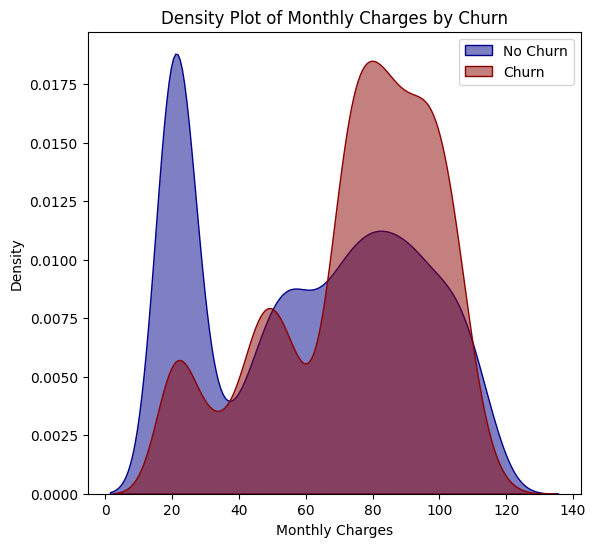

In [22]:
plt.figure(figsize=(14, 6))

# KDE Plot for Churned and Non-Churned Customers
plt.subplot(1, 2, 1)
sns.kdeplot(MonthlyCharges_Churn_no, label="No Churn", color="darkblue", fill=True, alpha=0.5)
sns.kdeplot(MonthlyCharges_Churn_yes, label="Churn", color="darkred", fill=True, alpha=0.5)
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot of Monthly Charges by Churn")

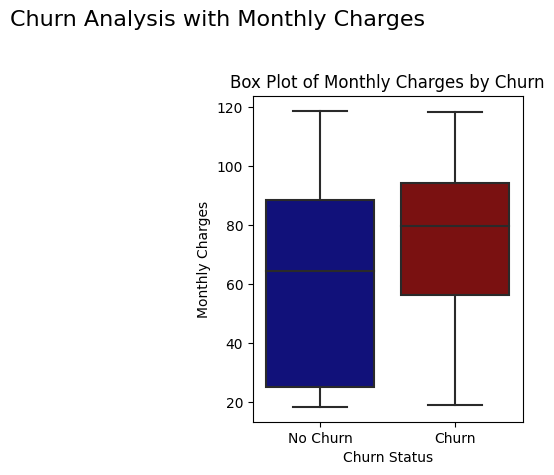

In [23]:
# Box Plot for Churned and Non-Churned Customers
plt.subplot(1, 2, 2)
sns.boxplot(data=[MonthlyCharges_Churn_no, MonthlyCharges_Churn_yes], palette=["darkblue", "darkred"])
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")
plt.title("Box Plot of Monthly Charges by Churn")

plt.suptitle("Churn Analysis with Monthly Charges", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
Tenure_CHurn_no=df_final[df_final["Churn"]=="No"].tenure
Tenure_CHurn_yes=df_final[df_final["Churn"]=="Yes"].tenure

Text(0.5, 1.0, 'Churn With tenure')

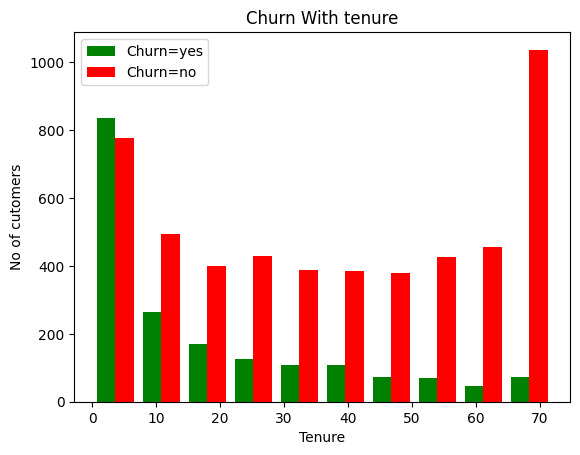

In [25]:
plt.hist([Tenure_CHurn_yes,Tenure_CHurn_no],color=["green","red"],label=["Churn=yes","Churn=no"])
plt.xlabel("Tenure")
plt.ylabel("No of cutomers")
plt.legend()
plt.title("Churn With tenure")


In [26]:
TotalCharges_Churn_yes=df_final[df_final["Churn"]=="Yes"].TotalCharges
TotalCharges_Churn_no=df_final[df_final["Churn"]=="No"].TotalCharges

Text(0.5, 1.0, 'Churn With Total Charges')

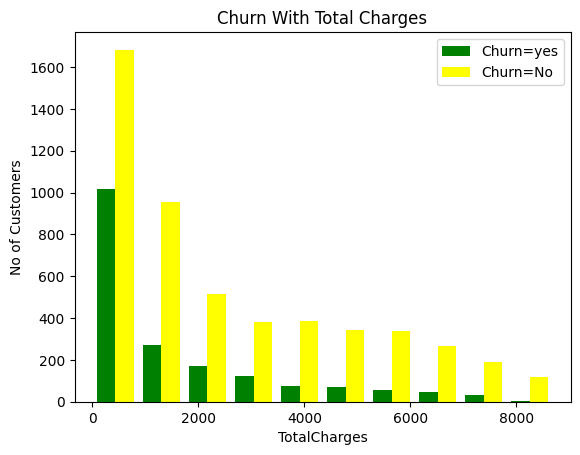

In [27]:
plt.hist([TotalCharges_Churn_yes,TotalCharges_Churn_no],color=["green","yellow"],label=["Churn=yes","Churn=No"])
plt.xlabel("TotalCharges")
plt.ylabel("No of Customers")
plt.legend()
plt.title("Churn With Total Charges")

In [28]:
df_final.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [30]:
for i in df_final.columns:
    if df_final[i].dtypes=="object":
        print(i,":",df_final[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
Col_to_be_renamed=["StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineBackup","OnlineSecurity"]

In [32]:
for i in Col_to_be_renamed:
    if 'No internet service' in df_final[i].unique():
        df_final[i].replace('No internet service',"No",inplace=True)

In [33]:
for j in Col_to_be_renamed:
 print(j,":",df_final[j].unique())

StreamingMovies : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
TechSupport : ['No' 'Yes']
DeviceProtection : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
OnlineSecurity : ['No' 'Yes']


In [34]:
for i in df_final.columns:
     if df_final[i].dtypes=="object":
         print(i,":",df_final[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [35]:
df_final["MultipleLines"]=df_final["MultipleLines"].astype("str")

In [36]:
df_final["MultipleLines"].replace('No phone service',"No",inplace=True)

In [37]:
for i in df_final.columns:
     if df_final[i].dtypes=="object":
         print(i,":",df_final[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [38]:
df_final["gender"]=df_final["gender"].apply(lambda x:0 if x=="Female" else 1)

In [39]:
df_final["gender"].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [40]:
for column in df_final:
     print(column,":",df_final[column].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [41]:
yes_no = ["Partner", "Dependents", "Churn", "PaperlessBilling", "StreamingMovies", 
          "StreamingTV", "TechSupport", "DeviceProtection", "TechSupport", 
          "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", 
          "PaymentMethod", "MonthlyCharges", "TotalCharges"]


In [42]:
# Assuming `df` is your DataFrame
df_yes_no = df[yes_no]

In [43]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
for i in yes_no:
     df_final[i]=df_final[i].apply(lambda x:1 if x=="Yes" else 0)

In [45]:
for column in df_final:
 print(column,":",df_final[column].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : [0 1]
TechSupport : [0]
StreamingTV : [0]
StreamingMovies : [0]
Contract : [0]
PaperlessBilling : [0]
PaymentMethod : [0]
MonthlyCharges : [0]
TotalCharges : [0]
Churn : [0 1]


In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   int64 
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   int64 
 3   Dependents        7043 non-null   int64 
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   int64 
 11  TechSupport       7043 non-null   int64 
 12  StreamingTV       7043 non-null   int64 
 13  StreamingMovies   7043 non-null   int64 
 14  Contract          7043 non-null   int64 
 15  PaperlessBilling  7043 non-null   int64 
 16  PaymentMethod     7043 non-null   int64 
 17  MonthlyCharges

In [47]:
onehot=["Contract","PaymentMethod","InternetService"]

In [48]:
df1=pd.get_dummies(data=df_final,columns=onehot)

In [49]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_0,PaymentMethod_0,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,No,No,No,Yes,0,...,0,0,0,0,0,True,True,True,False,False
1,1,0,0,0,34,Yes,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
2,1,0,0,0,2,Yes,No,Yes,Yes,0,...,0,0,0,0,1,True,True,True,False,False
3,1,0,0,0,45,No,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
4,0,0,0,0,2,Yes,No,No,No,0,...,0,0,0,0,1,True,True,False,True,False


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       7043 non-null   int64 
 1   SeniorCitizen                7043 non-null   int64 
 2   Partner                      7043 non-null   int64 
 3   Dependents                   7043 non-null   int64 
 4   tenure                       7043 non-null   int64 
 5   PhoneService                 7043 non-null   object
 6   MultipleLines                7043 non-null   object
 7   OnlineSecurity               7043 non-null   object
 8   OnlineBackup                 7043 non-null   object
 9   DeviceProtection             7043 non-null   int64 
 10  TechSupport                  7043 non-null   int64 
 11  StreamingTV                  7043 non-null   int64 
 12  StreamingMovies              7043 non-null   int64 
 13  PaperlessBilling             7043

 # <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Feature Engineering</p>

In [51]:
X=df1.drop("Churn",axis=1)

In [52]:
X1=df1.drop("Churn",axis=1).values

In [53]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_0,PaymentMethod_0,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,No,No,No,Yes,0,...,0,0,0,0,0,True,True,True,False,False
1,1,0,0,0,34,Yes,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
2,1,0,0,0,2,Yes,No,Yes,Yes,0,...,0,0,0,0,0,True,True,True,False,False
3,1,0,0,0,45,No,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
4,0,0,0,0,2,Yes,No,No,No,0,...,0,0,0,0,0,True,True,False,True,False


In [54]:
X.shape

(7043, 21)

In [55]:
y=df1["Churn"]

In [56]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [57]:
y.shape

(7043,)

In [58]:
X1

array([[0, 0, 1, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       ...,
       [0, 0, 1, ..., True, False, False],
       [1, 1, 1, ..., False, True, False],
       [1, 0, 0, ..., False, True, False]], dtype=object)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [60]:
if isinstance(X, pd.DataFrame):
    X = X.select_dtypes(include=[np.number])  # Select only numeric columns

sc = StandardScaler()
X_ = sc.fit_transform(X)

In [61]:
X_

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.2,random_state=0)

In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lg = LogisticRegression()

# Fit the model to your training data
lg.fit(X_train, y_train)

# Now you can get the score
train_score = lg.score(X_train, y_train)
print("Training Score:", train_score)


Training Score: 0.7566560170394037


In [64]:
test_score=lg.score(X_test,y_test)
test_score

0.7508871540099361

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%">Linear Regression</p>

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [66]:
lg=LogisticRegression(penalty="l2",solver='lbfgs')
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)

In [67]:
accuracy

0.7508871540099361

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%"> Random Forest</p>

In [68]:
rf=RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_pred_rf,y_test)


In [69]:
accuracy_rf

0.7459190915542938

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%">Decision Tree classifier</p>

In [70]:
dt=DecisionTreeClassifier(criterion="entropy",splitter="best",min_samples_split=5)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(y_pred_dt,y_test)

In [71]:
accuracy_dt

0.7423704755145494

In [72]:
cls=classification_report(y_pred,y_test)
print(cls)

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1270
           1       0.21      0.56      0.31       139

    accuracy                           0.75      1409
   macro avg       0.58      0.67      0.58      1409
weighted avg       0.87      0.75      0.79      1409



In [73]:
cf=confusion_matrix(y_pred,y_test)

In [74]:
print(cf)

[[980 290]
 [ 61  78]]


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%"> XGB Boost</p>

In [75]:
import xgboost

In [76]:
from xgboost import XGBClassifier

In [77]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
Accuracy_xg=accuracy_score(y_pred,y_test)

In [78]:
Accuracy_xg

0.7508871540099361

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 30px; border-radius: 20px; border: 8px solid black; width:90%">Adaboost classifier</p>

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
ad=AdaBoostClassifier(algorithm='SAMME')
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
Accuracy_ad=accuracy_score(y_pred_ad,y_test)

In [81]:
Accuracy_ad

0.751596877217885

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid={
 "penalty":["l1","l2"],
 "solver":["lbfgs","liblinear","newton_cg","newton_cholesky","sag","saga"]
}
model=LogisticRegression()


In [84]:
grid_search_lg=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

In [85]:
grid_search_lg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton_cg',
                                    'newton_cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [86]:
best=grid_search_lg.best_params_

In [87]:
best

{'penalty': 'l1', 'solver': 'saga'}

In [88]:
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}

In [89]:
grid_search_rf=GridSearchCV(param_grid=param_grid,scoring="accuracy",estimator=rf,cv=5)

In [90]:
grid_search_rf.fit(X,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                              min_samples_split=5),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [91]:
best=grid_search_rf.best_params_

In [92]:
print(best)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [93]:
param = {
 'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 5, 7],
 'subsample': [0.8, 0.9, 1.0],
 'colsample_bytree': [0.8, 0.9, 1.0],
}

In [94]:
grid_xg=GridSearchCV(scoring="accuracy",estimator=xg,param_grid=param)

In [95]:
grid_xg.fit(X,y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [96]:
best=grid_xg.best_params_

In [97]:
print(best)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [98]:
xg=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=3,n_estimators=50,subsample=0.9)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
Accuracy_xg=accuracy_score(y_pred,y_test)


In [99]:
Accuracy_xg

0.7508871540099361

# Conclusion
Telecom customer churn prediction is a crucial task for businesses to improve customer retention. By preprocessing data, choosing the right model, and evaluating the results, you can build an effective system to predict churn and take actionable steps to prevent it.